In [329]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 

In [330]:
df = pd.read_csv('Desktop/crime.csv', sep=';', engine='python')

In [331]:
df['salary'] = df['salary'].astype('int64')
df['population'] = df['population'].astype('int64')

In [332]:
df.head()

,region,year,workless people,salary,crime level,population
0,Адыгея,2017,17600,23040,4014,453366
1,Алтайский край,2017,78200,23595,40055,2365680
2,Амурская область,2017,24300,39606,18505,801752
3,Архангельская область,2017,38000,43089,19193,1121813
4,Астраханская область,2017,40000,27900,13432,1018866


In [333]:
df.columns

Index(['region', ' year', 'workless people', 'salary', 'crime level',
       'population'],
      dtype='object')

In [334]:
df.shape

(340, 6)

#### Вычислим коэффициенты корреляции между числом преступлений, зарплатой и безработицей в исходной выборке

In [335]:
x = df['workless people']/df['workless people'][0]
y = df['crime level']/df['crime level'][0]
print("Correlation coefficient between workless people and crime level:", np.corrcoef(x,y)[0][1])

Correlation coefficient between workless people and crime level: 0.7260152795027354


In [336]:
x = df['salary']/df['salary'][0]
y = df['crime level']/df['crime level'][0]
print("Correlation coefficient between salary and crime level:", np.corrcoef(x,y)[0][1])

Correlation coefficient between salary and crime level: 0.13926539477425265


По полученным значениям можно сделать вывод, что между количеством безработных и количеством преступлений сильная прямая связь, то есть чем больше один показатель, тем больше другой. Между размером зарплаты и числом преступлений связь практически отсутствует.

### Нормализация данных

In [337]:
X_for_scale = pd.concat([df['workless people'], df['salary'], df['crime level']], axis=1, keys=['workless people', 'salary', 'crime level'])

In [338]:
scaler = MinMaxScaler()
new_df=pd.DataFrame(scaler.fit_transform(X_for_scale), columns=['workless people', 'salary', 'crime level'])

In [339]:
new_df.head()

,workless people,salary,crime level
0,0.093610,0.060362,0.016975
1,0.433296,0.067157,0.202250
2,0.131166,0.263193,0.091468
3,0.207960,0.305838,0.095005
4,0.219170,0.119867,0.065389


In [340]:
X =  pd.concat([new_df['workless people'], new_df['salary']], axis=1, keys=['workless people', 'salary'])

In [341]:
y = new_df['crime level'].tolist()

In [342]:
X.head()

,workless people,salary
0,0.093610,0.060362
1,0.433296,0.067157
2,0.131166,0.263193
3,0.207960,0.305838
4,0.219170,0.119867


### Разбиваем выборку на train и test

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [345]:
len(X_train)

238

### Модели 

 ### 1. Линейная регрессия

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

In [347]:
reg = LinearRegression().fit(X_train, y_train)

In [348]:
reg.score(X_test, y_test)

0.6149450746846059

In [349]:
y_predict=reg.predict(X_test)

In [350]:
from sklearn.metrics import mean_absolute_error

In [351]:
mean_absolute_error(y_test, y_predict)

0.04496633254565566

In [352]:
clf = BayesianRidge()
clf.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [353]:
clf.score(X_test, y_test)

0.6133205819189884

In [354]:
y_predict=clf.predict(X_test)

In [355]:
mean_absolute_error(y_test, y_predict)

0.04504845245949638

In [356]:
import pandas as pd
from statistics import mean
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import xgboost
import lightgbm

#### DecisionTreeRegressor

In [100]:
#tuning of parametes
tree_params = {'max_depth': range(1,11),
                'min_samples_leaf': range(1,5)}

tree = DecisionTreeRegressor(random_state=17)

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

print(tree_grid.best_params_)

print(tree_grid.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.1s


{'max_depth': 5, 'min_samples_leaf': 2}
0.7969770153376174


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [357]:
tree = DecisionTreeRegressor(random_state=17, max_depth=5, min_samples_leaf=2)

tree.fit(X_train, y_train)

print("The coefficient of determination R^2 of the prediction.", tree.score(X_test,y_test))

print(np.mean(cross_val_score(tree, X_train, y_train, cv=5)))

reg_tree_pred = tree.predict(X_test)

print("Decision tree regressor, MAE = ", mean_absolute_error(y_test, reg_tree_pred))

The coefficient of determination R^2 of the prediction. 0.7901704787292931
0.7970477793506682
Decision tree regressor, MAE =  0.03686846720425683


Text(0, 0.5, 'True values')

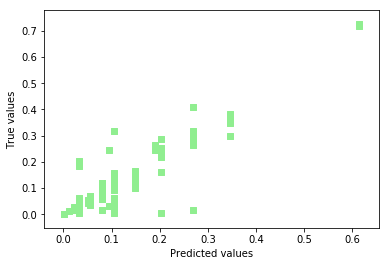

In [358]:
plt.scatter(reg_tree_pred,  y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('True values')

#### RandomForestRegressor

In [117]:
tree_params = {'bootstrap': [True, False],
 'max_depth': [2, 5, 10, 20, 30, 50, 70, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': range(2,5),
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400, 700, 1000, 1600]}

random_forest = RandomForestRegressor()

forest_grid = GridSearchCV(random_forest, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

print(forest_grid.best_params_) #{'max_depth': 10, 'min_samples_leaf': 4}
print(forest_grid.best_score_) #0.9228446352805121

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed: 37.3min finished
C:\ProgramData\Anaconda3\lib\site-pa

{'bootstrap': False, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1600}
0.8162147197443523


In [359]:
random_forest = RandomForestRegressor(n_estimators=1600, criterion='mse', max_depth=5, min_samples_split=10, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
random_forest.fit(X_train, y_train)
print("Random forest score =", random_forest.score(X_test, y_test))
forest_pred = random_forest.predict(X_test)
print("Mean absolute error = ", mean_absolute_error(y_test, forest_pred))

Random forest score = 0.7997976358969136
Mean absolute error =  0.03644011125682746


Text(0, 0.5, 'True values')

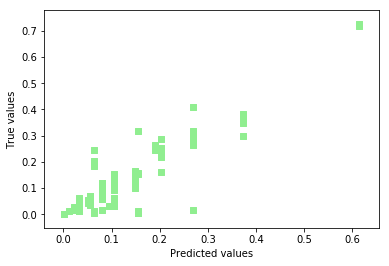

In [360]:
plt.scatter(forest_pred,  y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('True values')

#### xgboost

In [127]:
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6],
    'gamma':[0,0.03,0.1],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-2,  0.75],
    'reg_lambda':[1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   29.6s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   38.1s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   53.1s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Do

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=Non...
             iid=False, n_jobs=6,
             param_grid={'colsample_bytree': [0.4, 0.6],
                         'gamma': [0, 0.03, 0.1], 'learning_rate': [0.07],
                         'max_depth': [3, 5], 'min_child_weight': [1.5, 6, 10],
                         'n_estimators': [10000], 'reg_alpha': [0.01, 0.75],
      

In [192]:
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

best params
{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 10000, 'reg_alpha': 0.75, 'reg_lambda': 0.01, 'subsample': 0.6}
best score
-0.0052828634590564175


In [193]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=6,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.01,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

print("best_xgb_model score: ",best_xgb_model.score(X_test,y_test))


xgb_pred = best_xgb_model.predict(X_test)

print("Mean absolute error: ",mean_absolute_error(y_test, xgb_pred))

best_xgb_model score:  0.58983496538181
Mean absolute error:  0.04518973952328344


#### lightgbm

In [134]:
lightgbm = lightgbm.LGBMRegressor(boosting_type='gbdt',
                               num_leaves=100,
                               learning_rate=0.05)

In [135]:
lightgbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=100, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [139]:
lightgbm.score(X_test,y_test)

0.6697822033344962

In [136]:
print(np.mean(cross_val_score(lightgbm, X_train, y_train, cv=3)))

0.6729407460251933


In [137]:
lightgbm_pred = lightgbm.predict(X_test)

In [138]:
mean_absolute_error(y_test, lightgbm_pred)

0.04247944263410246

Лучший результат показал RandomForestRegressor, поэтому окончательный прогноз будет сделан с помощью него.Нужно вернуть значения предсказаний к исходному виду с помощью метода inverse_transform.

In [361]:
forest_predict = pd.DataFrame(forest_pred, columns={'crime level'})

In [362]:
X_test_copy = X_test.copy()
X_test_copy.reset_index(inplace=True) 

In [363]:
X_test_copy.head()

,index,workless people,salary
0,225,0.125000,0.092490
1,271,0.118834,0.079230
2,204,0.268498,0.208855
3,274,0.258408,0.086111
4,299,0.067825,0.146424


In [364]:
y_result=pd.concat([X_test_copy['workless people'], X_test_copy['salary'], forest_predict['crime level']], axis=1, keys=['workless people', 'salary', 'crime level'])

In [365]:
y_result=scaler.inverse_transform(y_result)

In [366]:
df.loc[225]

region             Республика Тыва
 year                         2015
workless people              23200
salary                       25664
crime level                   8439
population                  313777
Name: 225, dtype: object

In [367]:
df_result=X_test.copy()

In [368]:
df_result['region']=df['region']
df_result['year']=df[' year']
df_result['crime level predicted']=np.round(y_result[:,2],0)
df_result['workless people']=np.round(y_result[:,0],0)
df_result['salary']=np.round(y_result[:,1],0)

### Итоговый датасет с предсказаниями для тестовой выборки

In [369]:
df_result.head()

,workless people,salary,region,year,crime level predicted
225,23200.0,25664.0,Республика Тыва,2015,11529.0
271,22100.0,24581.0,Ивановская область,2018,11529.0
204,48800.0,35168.0,Ленинградская область,2015,29587.0
274,47000.0,25143.0,Кабардино-Балкарская Респ.,2018,21251.0
299,13000.0,30069.0,Новгородская область,2018,10593.0


#### Вычислим коэффициенты корреляции между числом преступлений, зарплатой и безработицей в выборке с предсказанной преступностью

In [370]:
print("Correlation coefficient between workless people and crime level:", np.corrcoef(df_result['workless people'],df_result['crime level predicted'])[0][1])

Correlation coefficient between workless people and crime level: 0.7795887334219888


In [371]:
print("Correlation coefficient between salary and crime level:", np.corrcoef(df_result['salary'],df_result['crime level predicted'])[0][1])

Correlation coefficient between salary and crime level: 0.25561180762651947


#### Вывод:

По полученным значениям можно сделать вывод, что между количеством безработных и количеством преступлений сильная прямая связь, то есть чем больше один показатель, тем больше другой. Между размером зарплаты и числом преступлений связь практически отсутствует.

По данным можно заметить, что в двух регионах с одинаковой средней зарплатой преступлений будет больше там, где число безработных больше. Как видно из коэффициента корреляции это верно не только для регионов с одинаковой зарплатой. Но проиллюстрирую пример с одинаковой зарплатой.   

In [372]:
df_result.reset_index(inplace=True) 

In [380]:
#Для примера возьмём все строки, зарплата в которых не сильно отличается от зарплаты в первой строке, и выведем количество 
# безработных людей и количество преступлений рядом друг с другом
for i in range(len(df_result)):
    if (abs(df_result['salary'][0]-df_result['salary'][i])<1000):
        print(df_result['workless people'][i],df_result['crime level predicted'][i])
    

23200.0 11529.0
47000.0 21251.0
34200.0 16224.0
36500.0 19197.0
71700.0 30692.0
17300.0 6894.0
30600.0 16224.0
12200.0 6894.0
68200.0 30692.0
57400.0 29587.0
28300.0 11529.0
30500.0 16224.0
27000.0 11529.0
29800.0 16224.0
70200.0 30692.0
32800.0 16224.0
130300.0 30692.0
86300.0 30692.0
66300.0 30692.0
14800.0 6894.0


То есть безработица влияет на уровень преступности, зарплата слабо влияет на уровень преступности.

У безработного человека доходы от легальной деятельности нулевые, то есть, чтобы левая часть неравенства была больше правой, достаточно, чтобы она была больше нуля.   

Если человек работает, то можно подобрать параметры так, чтобы неравенство Беккера выполнялось.
Допустим, возьмём регион со средней зарплатой 25000 - доходы от легальной деятельности. Вероятность быть пойманным примем за 0.7. Доход от кражи, допустим, 200000, наказание - штраф 30000. Тогда по формуле $0.3*200000 - 0.7*30000 = 39000 > 25000$, кража будет совершена.

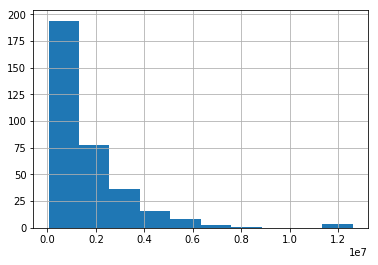

In [381]:
df['population'].hist()

In [387]:
df_short = df.copy()

In [394]:
df_short = df_short.drop(df_short[df_short['region'] == 'Москва'].index)

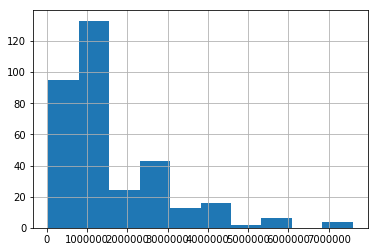

In [396]:
df_short['population'].hist()

In [395]:
df_short[df_short['region'] == 'Москва'].index

Int64Index([], dtype='int64')

In [397]:
print("Correlation coefficient between salary and crime level:", np.corrcoef(df_short['salary'],df_short['crime level'])[0][1])

Correlation coefficient between salary and crime level: -0.05066676304247349


In [398]:
df_short[df_short['region'] == 'Московская область'].index

Int64Index([40, 125, 210, 295], dtype='int64')

In [399]:
df_short = df_short.drop(df_short[df_short['region'] == 'Московская область'].index)

In [401]:
print("Correlation coefficient between salary and crime level:", np.corrcoef(df_short['salary'],df_short['crime level'])[0][1])

Correlation coefficient between salary and crime level: -0.089833870894396
